In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cv2
import sqlite3
import pandas as pd

dbname = 'nishioka-nakajima_6-3_6-7-4-6.db'
conn = sqlite3.connect(dbname)
c = conn.cursor()
#df_score = pd.read_sql("select * from score", conn)
df_score=pd.read_csv("fix_score.csv")
df_match = pd.read_sql("select * from match", conn)
df_shot = pd.read_sql("select * from shot", conn)

df_score_1set=df_score[df_score['Set']=='0-0']
df_score_2set=df_score[df_score['Set']=='1-0']
df_score_3set=df_score[df_score['Set']=='1-1']

In [159]:
#df_score.to_csv("score.csv")
df_shot.to_csv("shot.csv")
df_match.to_csv("match.csv")

In [164]:
df_score

,Unnamed: 0,index,StartFrame,EndFrame,Set,Game,Score,ScoreResult,FirstSecond,Server,...,ContactServeX,ContactServeY,Court1X,Court1Y,Court2X,Court2Y,Court3X,Court3Y,Court4X,Court4Y
0,0,0,0,699,NaN,NaN,NaN,NaN,1,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,1,700,1250,0-0,0-0,0-0,15-0,2,Nakashima,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1251,1695,0-0,0-0,15-0,30-0,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1696,2221,0-0,0-0,30-0,40-0,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2222,3175,0-0,0-0,40-0,40-15,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,301,301,258235,259361,1-1,4-5,15-30,15-40,1,Nishioka,...,0,0,0,0,0,0,0,0,0,0
302,302,302,259362,259637,NaN,NaN,NaN,NaN,1,NaN,...,0,0,0,0,0,0,0,0,0,0
303,303,303,259638,260933,1-1,4-5,15-40,30-40,2,Nishioka,...,0,0,0,0,0,0,0,0,0,0
304,304,304,260934,262240,1-1,4-5,30-40,0-0,1,Nishioka,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_match

,index,playerA,playerB,number,totalGame,faultFlug
0,0,Nakashima,Nishioka,305,32,0


In [20]:
df_score_1set

,Unnamed: 0,index,StartFrame,EndFrame,Set,Game,Score,ScoreResult,FirstSecond,Server,...,ContactServeX,ContactServeY,Court1X,Court1Y,Court2X,Court2Y,Court3X,Court3Y,Court4X,Court4Y
1,1,1,700,1250,0-0,0-0,0-0,15-0,2,Nakashima,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1251,1695,0-0,0-0,15-0,30-0,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1696,2221,0-0,0-0,30-0,40-0,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2222,3175,0-0,0-0,40-0,40-15,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
6,6,6,3496,4161,0-0,0-0,40-15,40-30,2,Nakashima,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,93,73895,74774,0-0,5-3,30-15,30-30,2,Nakashima,...,0,0,0,0,0,0,0,0,0,0
95,95,95,75015,76829,0-0,5-3,30-30,40-30,2,Nakashima,...,0,0,0,0,0,0,0,0,0,0
97,97,97,76930,78248,0-0,5-3,40-30,40-40,2,Nakashima,...,0,0,0,0,0,0,0,0,0,0
99,99,99,78511,79069,0-0,5-3,40-40,Ad-40,2,Nakashima,...,0,0,0,0,0,0,0,0,0,0


In [47]:
from collections import Counter
from collections import defaultdict

serverWinner_1set=defaultdict(Counter)
serverWinner_2set=defaultdict(Counter)
serverWinner_3set=defaultdict(Counter)

serverWinner_1set['Nakashima']['Nakashima']=df_score_1set[(df_score_1set['Server']=='Nakashima') & (df_score_1set['PointWinner']=='Nakashima')]
serverWinner_1set['Nakashima']['Nishioka']=df_score_1set[(df_score_1set['Server']=='Nakashima') & (df_score_1set['PointWinner']=='Nishioka')]
serverWinner_1set['Nishioka']['Nishioka']=df_score_1set[(df_score_1set['Server']=='Nishioka') & (df_score_1set['PointWinner']=='Nishioka')]
serverWinner_1set['Nishioka']['Nakashima']=df_score_1set[(df_score_1set['Server']=='Nishioka') & (df_score_1set['PointWinner']=='Nakashima')]

serverWinner_2set['Nakashima']['Nakashima']=df_score_2set[(df_score_2set['Server']=='Nakashima') & (df_score_2set['PointWinner']=='Nakashima')]
serverWinner_2set['Nakashima']['Nishioka']=df_score_2set[(df_score_2set['Server']=='Nakashima') & (df_score_2set['PointWinner']=='Nishioka')]
serverWinner_2set['Nishioka']['Nishioka']=df_score_2set[(df_score_2set['Server']=='Nishioka') & (df_score_2set['PointWinner']=='Nishioka')]
serverWinner_2set['Nishioka']['Nakashima']=df_score_2set[(df_score_2set['Server']=='Nishioka') & (df_score_2set['PointWinner']=='Nakashima')]

serverWinner_3set['Nakashima']['Nakashima']=df_score_3set[(df_score_3set['Server']=='Nakashima') & (df_score_3set['PointWinner']=='Nakashima')]
serverWinner_3set['Nakashima']['Nishioka']=df_score_3set[(df_score_3set['Server']=='Nakashima') & (df_score_3set['PointWinner']=='Nishioka')]
serverWinner_3set['Nishioka']['Nishioka']=df_score_3set[(df_score_3set['Server']=='Nishioka') & (df_score_3set['PointWinner']=='Nishioka')]
serverWinner_3set['Nishioka']['Nakashima']=df_score_3set[(df_score_3set['Server']=='Nishioka') & (df_score_3set['PointWinner']=='Nakashima')]

In [19]:
len(serverWinner['Nishioka']['Nakashima'])

11

In [29]:
serverWinner['Nakashima']['Nakashima'].groupby('PointPattern').groups

{'サービスエース': Int64Index([2], dtype='int64'),
 'ストロークウィナー': Int64Index([43, 45, 52, 59, 77, 91], dtype='int64'),
 'ストロークエラー': Int64Index([8, 22, 49, 67, 69, 70, 88, 95], dtype='int64'),
 'ボレーウィナー': Int64Index([46, 100], dtype='int64'),
 'リターンエラー': Int64Index([1, 3, 23, 24, 39, 54, 58, 60, 76, 78, 99], dtype='int64')}

In [33]:
serverWinner['Nakashima']['Nakashima'].groupby('PointPattern').get_group('リターンエラー')

,Unnamed: 0,index,StartFrame,EndFrame,Set,Game,Score,ScoreResult,FirstSecond,Server,...,ContactServeX,ContactServeY,Court1X,Court1Y,Court2X,Court2Y,Court3X,Court3Y,Court4X,Court4Y
1,1,1,700,1250,0-0,0-0,0-0,15-0,2,Nakashima,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1696,2221,0-0,0-0,30-0,40-0,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
23,23,23,15093,15646,0-0,2-0,15-15,30-15,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
24,24,24,15647,16113,0-0,2-0,30-15,40-15,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
39,39,39,28805,29264,0-0,3-1,0-0,15-0,2,Nakashima,...,0,0,0,0,0,0,0,0,0,0
54,54,54,38776,39333,0-0,3-1,40-40,Ad-40,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
58,58,58,41620,42319,0-0,3-1,40-Ad,40-40,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
60,60,60,43125,47141,0-0,3-1,Ad-40,0-0,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
76,76,76,59337,59792,0-0,4-2,40-Ad,40-40,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0
78,78,78,60370,66709,0-0,4-2,Ad-40,0-0,1,Nakashima,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_shot

,index,point,frame,ballx,bally,playerAx,playerAy,playerBx,playerBy,hitplayer,bouncehit,foreback,direction
0,0,1,861.0,12.2,23.47,4.57,-1.97,10.0,23.47,Nishioka,Hit,Fore,Cross
1,1,2,1296.0,5.42,17.15,,,,,Nishioka,Bounce,,Cross
2,2,3,1730.0,9.26,16.21,,,,,Nishioka,Bounce,,Cross
3,3,3,1742.0,13.96,24.5,4.57,-0.04,11.12,24.5,Nishioka,Hit,Fore,Cross
4,4,4,2241.0,2.23,16.56,,,,,Nishioka,Bounce,,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,304,261291.0,3.98,-1.62,4.65,-1.62,5.72,26.08,Nakashima,Hit,Fore,Cross
1987,1987,304,261320.0,8.7,23.42,,,,,Nakashima,Bounce,,Cross
1988,1988,304,261327.0,9.6,26.74,5.42,-1.85,8.37,26.74,Nakashima,Hit,Fore,Cross
1989,1989,304,261353.0,4.01,5.74,,,,,Nakashima,Bounce,,Cross


In [56]:
serverWinner_3set['Nakashima']['Nakashima'].groupby('PointPattern').size()

PointPattern
サービスエース      4
ストロークウィナー    3
ストロークエラー     2
ボレーエラー       2
リターンエラー      7
dtype: int64

In [57]:
serverWinner_3set['Nishioka']['Nishioka'].groupby('PointPattern').size()

PointPattern
サービスエース      2
ストロークウィナー    4
ストロークエラー     7
リターンエラー      5
dtype: int64

In [58]:
serverWinner_3set['Nishioka']['Nakashima'].groupby('PointPattern').size()

PointPattern
ストロークウィナー    1
ストロークエラー     6
ダブルフォルト      1
ボレーエラー       1
dtype: int64

In [59]:
serverWinner_3set['Nakashima']['Nishioka'].groupby('PointPattern').size()

PointPattern
ストロークウィナー     3
ストロークエラー     11
ボレーウィナー       1
dtype: int64

In [141]:
#サーブ着地点のデータ抽出
from collections import Counter
from collections import defaultdict

bounce_serve=defaultdict(Counter)
bounce_serve_1set=defaultdict(Counter)
bounce_serve_2set=defaultdict(Counter)
bounce_serve_3set=defaultdict(Counter)

def returnServeBounce(df_score,df_shot,playerName):
    df_nishioka=df_score[df_score['Server']==playerName]
    df_nishioka_1st=df_nishioka[df_nishioka['FirstSecond']==1]
    df_nishioka_2nd=df_nishioka[df_nishioka['FirstSecond']==2]

    l=df_nishioka_1st['index'].values.tolist()
    df_nishioka_shot=df_shot[df_shot['point'].isin(l)]
    df_nishioka_shot_bounce=df_nishioka_shot[df_nishioka_shot['bouncehit']=='Bounce']
    grouped=df_nishioka_shot_bounce.groupby('point')
    df_nishioka_shot_bounce_serve_1st=df_nishioka_shot_bounce.loc[grouped['point'].idxmin()]

    l=df_nishioka_2nd['index'].values.tolist()
    df_nishioka_shot=df_shot[df_shot['point'].isin(l)]
    df_nishioka_shot_bounce=df_nishioka_shot[df_nishioka_shot['bouncehit']=='Bounce']
    grouped=df_nishioka_shot_bounce.groupby('point')
    df_nishioka_shot_bounce_serve_2nd=df_nishioka_shot_bounce.loc[grouped['point'].idxmin()]
    return df_nishioka_shot_bounce_serve_1st,df_nishioka_shot_bounce_serve_2nd



bounce_serve['Nishioka']['1st'],bounce_serve['Nishioka']['2nd']=returnServeBounce(df_score,df_shot,'Nishioka')
bounce_serve['Nakashima']['1st'],bounce_serve['Nakashima']['2nd']=returnServeBounce(df_score,df_shot,'Nakashima')

bounce_serve_1set['Nishioka']['1st'],bounce_serve_1set['Nishioka']['2nd']=returnServeBounce(df_score_1set,df_shot,'Nishioka')
bounce_serve_1set['Nakashima']['1st'],bounce_serve_1set['Nakashima']['2nd']=returnServeBounce(df_score_1set,df_shot,'Nakashima')
bounce_serve_2set['Nishioka']['1st'],bounce_serve_2set['Nishioka']['2nd']=returnServeBounce(df_score_2set,df_shot,'Nishioka')
bounce_serve_2set['Nakashima']['1st'],bounce_serve_2set['Nakashima']['2nd']=returnServeBounce(df_score_2set,df_shot,'Nakashima')
bounce_serve_3set['Nishioka']['1st'],bounce_serve_3set['Nishioka']['2nd']=returnServeBounce(df_score_3set,df_shot,'Nishioka')
bounce_serve_3set['Nakashima']['1st'],bounce_serve_3set['Nakashima']['2nd']=returnServeBounce(df_score_3set,df_shot,'Nakashima')


In [139]:
#リターン位置のデータを抽出する
from collections import Counter
from collections import defaultdict

bounce_return=defaultdict(Counter)
bounce_return_1set=defaultdict(Counter)
bounce_return_2set=defaultdict(Counter)
bounce_return_3set=defaultdict(Counter)
def returnReturnPosition(df_score,df_shot,playerName='Nishioka'):
    df_nishioka=df_score[df_score['Server']==playerName]
    df_nishioka_1st=df_nishioka[df_nishioka['FirstSecond']==1]
    df_nishioka_2nd=df_nishioka[df_nishioka['FirstSecond']==2]

    l=df_nishioka_1st['index'].values.tolist()
    df_nishioka_shot=df_shot[df_shot['point'].isin(l)]
    df_nishioka_shot_bounce=df_nishioka_shot[df_nishioka_shot['bouncehit']=='Hit']
    grouped=df_nishioka_shot_bounce.groupby('point')
    df_nishioka_shot_bounce_serve_1st=df_nishioka_shot_bounce.loc[grouped['point'].idxmin()]

    l=df_nishioka_2nd['index'].values.tolist()
    df_nishioka_shot=df_shot[df_shot['point'].isin(l)]
    df_nishioka_shot_bounce=df_nishioka_shot[df_nishioka_shot['bouncehit']=='Hit']
    grouped=df_nishioka_shot_bounce.groupby('point')
    df_nishioka_shot_bounce_serve_2nd=df_nishioka_shot_bounce.loc[grouped['point'].idxmin()]
    return df_nishioka_shot_bounce_serve_1st,df_nishioka_shot_bounce_serve_2nd

bounce_return['Nishioka']['1st'],bounce_return['Nishioka']['2nd']=returnReturnPosition(df_score,df_shot,'Nishioka')
bounce_return['Nakashima']['1st'],bounce_return['Nakashima']['2nd']=returnReturnPosition(df_score,df_shot,'Nakashima')

bounce_return_1set['Nishioka']['1st'],bounce_return_1set['Nishioka']['2nd']=returnReturnPosition(df_score_1set,df_shot,'Nishioka')
bounce_return_1set['Nakashima']['1st'],bounce_return_1set['Nakashima']['2nd']=returnReturnPosition(df_score_1set,df_shot,'Nakashima')
bounce_return_2set['Nishioka']['1st'],bounce_return_2set['Nishioka']['2nd']=returnReturnPosition(df_score_2set,df_shot,'Nishioka')
bounce_return_2set['Nakashima']['1st'],bounce_return_2set['Nakashima']['2nd']=returnReturnPosition(df_score_2set,df_shot,'Nakashima')
bounce_return_3set['Nishioka']['1st'],bounce_return_3set['Nishioka']['2nd']=returnReturnPosition(df_score_3set,df_shot,'Nishioka')
bounce_return_3set['Nakashima']['1st'],bounce_return_3set['Nakashima']['2nd']=returnReturnPosition(df_score_3set,df_shot,'Nakashima')

In [96]:
#リターン着地点データを抽出する

from collections import Counter
from collections import defaultdict

bounce_return_bounce=defaultdict(Counter)
bounce_return_bounce_1set=defaultdict(Counter)
bounce_return_bounce_2set=defaultdict(Counter)
bounce_return_bounce_3set=defaultdict(Counter)

def returnReturnBounce(df_score,df_shot,playerName):#playerName='Nishioka'
    df_nishioka=df_score[df_score['Server']==playerName]
    df_nishioka_1st=df_nishioka[df_nishioka['FirstSecond']==1]
    df_nishioka_2nd=df_nishioka[df_nishioka['FirstSecond']==2]

    l=df_nishioka_1st['index'].values.tolist()
    df_nishioka_shot=df_shot[df_shot['point'].isin(l)]#df_shotの中の西岡サーブ1stの行を抽出
    df_nishioka_shot_bounce=df_nishioka_shot[df_nishioka_shot['bouncehit']=='Bounce']#バウンスデータを抽出
    df_nishioka_shot_bounce
    grouped=df_nishioka_shot_bounce.groupby('point')#同じポイントをグループとしてまとめる
    grouped.nth(1)
    #grouped.groups#グループの中身をみる
    #grouped.size()#各グループのサイズ（カウント数）
    df_nishioka_shot_bounce_serve_1st=grouped.nth(1)#0番目ではなく1番目のリターン着地点データを抽出
    
    l=df_nishioka_2nd['index'].values.tolist()
    df_nishioka_shot=df_shot[df_shot['point'].isin(l)]#df_shotの中の西岡サーブ1stの行を抽出
    df_nishioka_shot_bounce=df_nishioka_shot[df_nishioka_shot['bouncehit']=='Bounce']#バウンスデータを抽出
    df_nishioka_shot_bounce
    grouped=df_nishioka_shot_bounce.groupby('point')#同じポイントをグループとしてまとめる
    grouped.nth(1)
    #grouped.groups#グループの中身をみる
    #grouped.size()#各グループのサイズ（カウント数）
    df_nishioka_shot_bounce_serve_2nd=grouped.nth(1)#0番目ではなく1番目のリターン着地点データを抽出
    return df_nishioka_shot_bounce_serve_1st,df_nishioka_shot_bounce_serve_2nd

bounce_return_bounce['Nishioka']['1st'],bounce_return_bounce['Nishioka']['2nd']=returnReturnBounce(df_score,df_shot,'Nishioka')
bounce_return_bounce['Nakashima']['1st'],bounce_return_bounce['Nakashima']['2nd']=returnReturnBounce(df_score,df_shot,'Nakashima')

bounce_return_bounce_1set['Nishioka']['1st'],bounce_return_bounce_1set['Nishioka']['2nd']=returnReturnBounce(df_score_1set,df_shot,'Nishioka')
bounce_return_bounce_1set['Nakashima']['1st'],bounce_return_bounce_1set['Nakashima']['2nd']=returnReturnBounce(df_score_1set,df_shot,'Nakashima')
bounce_return_bounce_2set['Nishioka']['1st'],bounce_return_bounce_2set['Nishioka']['2nd']=returnReturnBounce(df_score_2set,df_shot,'Nishioka')
bounce_return_bounce_2set['Nakashima']['1st'],bounce_return_bounce_2set['Nakashima']['2nd']=returnReturnBounce(df_score_2set,df_shot,'Nakashima')
bounce_return_bounce_3set['Nishioka']['1st'],bounce_return_bounce_3set['Nishioka']['2nd']=returnReturnBounce(df_score_3set,df_shot,'Nishioka')
bounce_return_bounce_3set['Nakashima']['1st'],bounce_return_bounce_3set['Nakashima']['2nd']=returnReturnBounce(df_score_3set,df_shot,'Nakashima')


In [94]:
df_nishioka_shot_bounce_serve_1st

,index,frame,ballx,bally,playerAx,playerAy,playerBx,playerBy,hitplayer,bouncehit,foreback,direction
point,,,,,,,,,,,,
11,42,7026.0,5.66,1.79,,,,,Nakashima,Bounce,,Cross
14,84,9459.0,6.62,3.24,,,,,Nakashima,Bounce,,Cross
17,90,10861.0,4.39,4.91,,,,,Nakashima,Bounce,,Cross
18,94,11443.0,4.23,1.42,,,,,Nakashima,Bounce,,Cross
29,162,22260.0,4.16,16.2,,,,,Nishioka,Bounce,,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...
282,1854,245521.0,6.52,0.48,,,,,Nakashima,Bounce,,Cross
287,1882,248261.0,5.6,4.44,,,,,Nakashima,Bounce,,Cross
300,1919,257579.0,5.43,20.44,,,,,Nakashima,Bounce,,Cross


In [61]:
df_shot

,index,point,frame,ballx,bally,playerAx,playerAy,playerBx,playerBy,hitplayer,bouncehit,foreback,direction
0,0,1,861.0,12.2,23.47,4.57,-1.97,10.0,23.47,Nishioka,Hit,Fore,Cross
1,1,2,1296.0,5.42,17.15,,,,,Nishioka,Bounce,,Cross
2,2,3,1730.0,9.26,16.21,,,,,Nishioka,Bounce,,Cross
3,3,3,1742.0,13.96,24.5,4.57,-0.04,11.12,24.5,Nishioka,Hit,Fore,Cross
4,4,4,2241.0,2.23,16.56,,,,,Nishioka,Bounce,,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,304,261291.0,3.98,-1.62,4.65,-1.62,5.72,26.08,Nakashima,Hit,Fore,Cross
1987,1987,304,261320.0,8.7,23.42,,,,,Nakashima,Bounce,,Cross
1988,1988,304,261327.0,9.6,26.74,5.42,-1.85,8.37,26.74,Nakashima,Hit,Fore,Cross
1989,1989,304,261353.0,4.01,5.74,,,,,Nakashima,Bounce,,Cross


In [115]:
bounce_return_1set['Nishioka']['1st']

,index,point,frame,ballx,bally,playerAx,playerAy,playerBx,playerBy,hitplayer,bouncehit,foreback,direction
41,41,11,7001.0,-1.25,23.89,7.5,-0.21,0.28,23.89,Nakashima,Hit,Back,Cross
83,83,14,9436.0,-1.48,23.75,7.43,-0.07,0.6,23.75,Nakashima,Hit,Back,Cross
89,89,17,10831.0,1.94,23.79,7.35,-0.86,1.67,23.79,Nakashima,Hit,Fore,Cross
93,93,18,11413.0,6.91,25.59,5.04,-0.81,7.79,25.59,Nakashima,Hit,Back,Cross
161,161,29,22236.0,1.85,-1.22,3.0,-1.22,5.96,23.01,Nishioka,Hit,Fore,Cross
173,173,30,23391.0,10.23,-0.75,9.03,-0.75,3.8,23.19,Nakashima,Hit,Back,Cross
200,200,35,26189.0,4.74,-0.62,3.88,-0.62,5.72,24.22,Nakashima,Hit,Back,Cross
353,353,61,47172.0,6.16,24.46,5.18,0.0,7.44,24.46,Nakashima,Hit,Back,Cross
363,363,62,47903.0,3.07,23.87,7.33,-0.74,2.24,23.87,Nakashima,Hit,Fore,Cross
368,368,63,48436.0,10.59,23.72,5.23,-0.37,9.22,23.72,Nakashima,Hit,Fore,Cross


17.184883720930237
16.97125
16.98758064516129
16.7169696969697


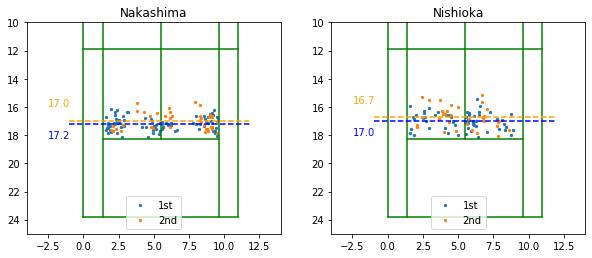

In [145]:
#サーブの着地点のプロット
import matplotlib.pyplot as plt
%matplotlib inline

def drawCourt(ax):#テニスコートラインを描画
    #横線
    ax.plot([0,10.97], [11.89,11.89], color = "green")
    ax.plot([0,10.97], [0,0], color = "green")
    ax.plot([0,10.97], [11.89*2,11.89*2], color = "green")
    ax.plot([10.97/2,10.97/2], [5.49,11.89*2-5.49], color = "green")

    #縦線
    ax.plot([0,0], [0,11.89*2], color = "green")
    ax.plot([1.37,1.37], [0,11.89*2], color = "green")
    ax.plot([1.37+8.23,1.37+8.23], [0,11.89*2], color = "green")
    ax.plot([1.37+8.23+1.37,1.37+8.23+1.37], [0,11.89*2], color = "green")

    ax.plot([1.37,1.37+8.23], [5.49,5.49], color = "green")
    ax.plot([1.37,1.37+8.23], [11.89*2-5.49,11.89*2-5.49], color = "green")
    return ax

def inputXY(bounce_serve,FS,playerName):
    x=bounce_serve[playerName][FS]['ballx'].values.tolist()
    y=bounce_serve[playerName][FS]['bally'].values.tolist()
    x = [float(s) for s in x]
    y = [float(s) for s in y]
    return x,y


def reverseXYList(xlist,ylist):
    xlist_r=[]
    ylist_r=[]
    for i, (x, y) in enumerate(zip(xlist, ylist)):
        if(y<11.89):
            y=11.89-(y-11.89)
            x=5.485-(x-5.485)
        xlist_r.append(x)
        ylist_r.append(y)
    
    ave = sum(ylist_r)/len(ylist_r)
    print(ave)
    return xlist_r,ylist_r,ave


def plotImpact(bounce_data):
    fig=plt.figure(figsize=(10.0, 10.0))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    ax1=drawCourt(ax1)
    ax2=drawCourt(ax2)

    x1,y1=inputXY(bounce_data,'1st','Nakashima')#bounce_serve
    x2,y2=inputXY(bounce_data,'2nd','Nakashima')

    x1,y1,ave1=reverseXYList(x1,y1)
    x2,y2,ave2=reverseXYList(x2,y2)

    ax1.scatter(x1,y1,s=5,label='1st')
    ax1.scatter(x2,y2,s=5,label='2nd')
    ax1.plot([-1,10.97+1],[ave1,ave1],color = "blue", linestyle="dashed")
    ax1.plot([-1,10.97+1],[ave2,ave2],color = "orange", linestyle="dashed")
    ax1.text(-2.5, ave1+1, str(round(ave1,1)),color="blue")
    ax1.text(-2.5, ave2-1, str(round(ave2,1)),color="orange")

    x1,y1=inputXY(bounce_data,'1st','Nishioka')
    x2,y2=inputXY(bounce_data,'2nd','Nishioka')

    x1,y1,ave1=reverseXYList(x1,y1)
    x2,y2,ave2=reverseXYList(x2,y2)

    ax2.scatter(x1,y1,s=5,label='1st')
    ax2.scatter(x2,y2,s=5,label='2nd')
    ax2.plot([-1,10.97+1],[ave1,ave1],color = "blue", linestyle="dashed")
    ax2.plot([-1,10.97+1],[ave2,ave2],color = "orange", linestyle="dashed")
    ax2.text(-2.5, ave1+1, str(round(ave1,1)),color="blue")
    ax2.text(-2.5, ave2-1, str(round(ave2,1)),color="orange")

    ax1.legend()
    ax2.legend()

    ax1.set_xlim(-4,14)
    ax1.set_ylim(25,10)
    ax2.set_xlim(-4,14)
    ax2.set_ylim(25,10)

    ax1.set_title("Nakashima")
    ax2.set_title("Nishioka")

    ax1.set_aspect('equal')
    ax2.set_aspect('equal')


    
plotImpact(bounce_serve)

17.112727272727273
17.034285714285716
16.850714285714286
16.574444444444445


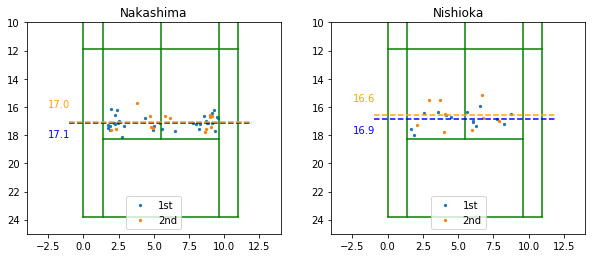

In [146]:
plotImpact(bounce_serve_1set)

17.305172413793105
16.994705882352942
16.97382352941176
16.6575


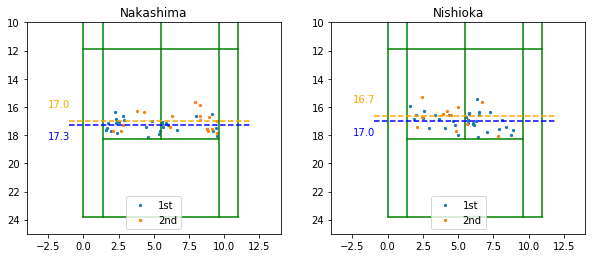

In [147]:
plotImpact(bounce_serve_2set)

17.138749999999995
16.828888888888887
17.157857142857146
16.88333333333333


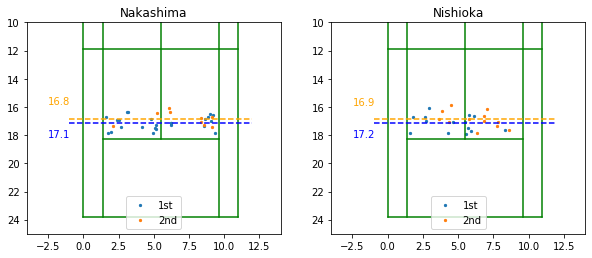

In [148]:
plotImpact(bounce_serve_3set)

In [ ]:
def serveCourceGraph(bounce_data):
    fig=plt.figure(figsize=(10.0, 10.0))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    #ax1=drawCourt(ax1)
    #ax2=drawCourt(ax2)

    x1,y1=inputXY(bounce_data,'1st','Nakashima')#bounce_serve
    x2,y2=inputXY(bounce_data,'2nd','Nakashima')

    x1,y1=reverseXYList(x1,y1)
    x2,y2=reverseXYList(x2,y2)

    ax1.scatter(x1,y1,s=5,label='1st')
    ax1.scatter(x2,y2,s=5,label='2nd')

    x1,y1=inputXY(bounce_data,'1st','Nishioka')
    x2,y2=inputXY(bounce_data,'2nd','Nishioka')

    x1,y1=reverseXYList(x1,y1)
    x2,y2=reverseXYList(x2,y2)

    ax2.scatter(x1,y1,s=5,label='1st')
    ax2.scatter(x2,y2,s=5,label='2nd')

    ax1.legend()
    ax2.legend()

    ax1.set_xlim(-4,14)
    ax1.set_ylim(30,10)
    ax2.set_xlim(-4,14)
    ax2.set_ylim(30,10)

    ax1.set_title("Nakashima")
    ax2.set_title("Nishioka")

    ax1.set_aspect('equal')
    ax2.set_aspect('equal')

24.540677966101697
23.3309375
26.446800000000003
26.005128205128205


Text(0.5, 1.0, 'Nishioka All')

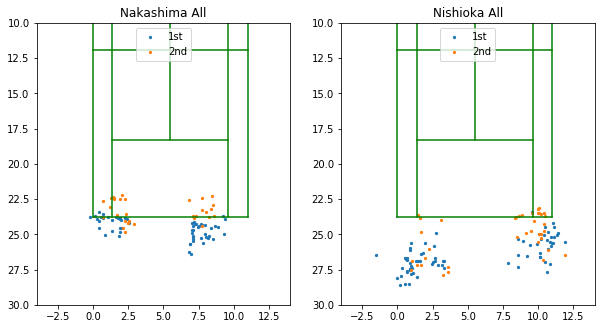

In [150]:
#相手のリターン位置
import matplotlib.pyplot as plt
%matplotlib inline

def drawCourt(ax):#テニスコートラインを描画
    #横線
    ax.plot([0,10.97], [11.89,11.89], color = "green")
    ax.plot([0,10.97], [0,0], color = "green")
    ax.plot([0,10.97], [11.89*2,11.89*2], color = "green")
    ax.plot([10.97/2,10.97/2], [5.49,11.89*2-5.49], color = "green")

    #縦線
    ax.plot([0,0], [0,11.89*2], color = "green")
    ax.plot([1.37,1.37], [0,11.89*2], color = "green")
    ax.plot([1.37+8.23,1.37+8.23], [0,11.89*2], color = "green")
    ax.plot([1.37+8.23+1.37,1.37+8.23+1.37], [0,11.89*2], color = "green")

    ax.plot([1.37,1.37+8.23], [5.49,5.49], color = "green")
    ax.plot([1.37,1.37+8.23], [11.89*2-5.49,11.89*2-5.49], color = "green")
    return ax

def inputXY(bounce_return,FS,playerName):
    sx=[]
    sy=[]
    rx=[]
    ry=[]
    
    ballx_list=bounce_return[playerName][FS]['ballx'].values.tolist()
    bally_list=bounce_return[playerName][FS]['bally'].values.tolist()
    ballx_list = [float(s) for s in ballx_list]
    bally_list = [float(s) for s in bally_list]
    
    ax_list=bounce_return[playerName][FS]['playerAx'].values.tolist()
    ay_list=bounce_return[playerName][FS]['playerAy'].values.tolist()
    ax_list = [float(s) for s in ax_list]
    ay_list = [float(s) for s in ay_list]
    
    bx_list=bounce_return[playerName][FS]['playerBx'].values.tolist()
    by_list=bounce_return[playerName][FS]['playerBy'].values.tolist()
    bx_list = [float(s) for s in bx_list]
    by_list = [float(s) for s in by_list]
    
    for i in range(len(ay_list)):
        if(abs(ay_list[i]-bally_list[i])<abs(by_list[i]-bally_list[i])):
            rx.append(ax_list[i])
            ry.append(ay_list[i])
            sx.append(bx_list[i])
            sy.append(by_list[i])
        else:
            rx.append(bx_list[i])
            ry.append(by_list[i])
            sx.append(ax_list[i])
            sy.append(ay_list[i])
            
    return sx,sy,rx,ry


def reverseXYList(xlist,ylist):
    xlist_r=[]
    ylist_r=[]
    for i, (x, y) in enumerate(zip(xlist, ylist)):
        if(y<11.89):
            y=11.89-(y-11.89)
            x=5.485-(x-5.485)
        xlist_r.append(x)
        ylist_r.append(y)
    ave = sum(ylist_r)/len(ylist_r)
    print(ave)
    return xlist_r,ylist_r,ave

fig=plt.figure(figsize=(10.0, 10.0))
#ax1=plt.axes()
#ax2=plt.axes()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1=drawCourt(ax1)
ax2=drawCourt(ax2)


sx1,sy1,rx1,ry1=inputXY(bounce_return,'1st','Nishioka')
sx2,sy2,rx2,ry2=inputXY(bounce_return,'2nd','Nishioka')

rx1,ry1,ave1=reverseXYList(rx1,ry1)
rx2,ry2,ave2=reverseXYList(rx2,ry2)

ax1.scatter(rx1,ry1,s=5,label='1st')
ax1.scatter(rx2,ry2,s=5,label='2nd')

sx1,sy1,rx1,ry1=inputXY(bounce_return,'1st','Nakashima')
sx2,sy2,rx2,ry2=inputXY(bounce_return,'2nd','Nakashima')

rx1,ry1,ave1=reverseXYList(rx1,ry1)
rx2,ry2,ave2=reverseXYList(rx2,ry2)

ax2.scatter(rx1,ry1,s=5,label='1st')
ax2.scatter(rx2,ry2,s=5,label='2nd')

ax1.legend(loc='upper center')
ax2.legend(loc='upper center')

ax1.set_xlim(-4,14)
ax1.set_ylim(30,10)
ax2.set_xlim(-4,14)
ax2.set_ylim(30,10)

ax1.set_aspect('equal')
ax2.set_aspect('equal')

ax1.set_title("Nakashima All")
ax2.set_title("Nishioka All")

In [108]:
bounce_return_1set['Nishioka']['1st']

,index,point,frame,ballx,bally,playerAx,playerAy,playerBx,playerBy,hitplayer,bouncehit,foreback,direction
41,41,11,7001.0,-1.25,23.89,7.5,-0.21,0.28,23.89,Nakashima,Hit,Back,Cross
83,83,14,9436.0,-1.48,23.75,7.43,-0.07,0.6,23.75,Nakashima,Hit,Back,Cross
89,89,17,10831.0,1.94,23.79,7.35,-0.86,1.67,23.79,Nakashima,Hit,Fore,Cross
93,93,18,11413.0,6.91,25.59,5.04,-0.81,7.79,25.59,Nakashima,Hit,Back,Cross
161,161,29,22236.0,1.85,-1.22,3.0,-1.22,5.96,23.01,Nishioka,Hit,Fore,Cross
173,173,30,23391.0,10.23,-0.75,9.03,-0.75,3.8,23.19,Nakashima,Hit,Back,Cross
200,200,35,26189.0,4.74,-0.62,3.88,-0.62,5.72,24.22,Nakashima,Hit,Back,Cross
353,353,61,47172.0,6.16,24.46,5.18,0.0,7.44,24.46,Nakashima,Hit,Back,Cross
363,363,62,47903.0,3.07,23.87,7.33,-0.74,2.24,23.87,Nakashima,Hit,Fore,Cross
368,368,63,48436.0,10.59,23.72,5.23,-0.37,9.22,23.72,Nakashima,Hit,Fore,Cross


In [154]:
bounce_return_2set['Nishioka']['1st']

,index,point,frame,ballx,bally,playerAx,playerAy,playerBx,playerBy,hitplayer,bouncehit,foreback,direction
683,683,115,94497.0,13.45,24.91,4.24,-0.15,11.41,24.91,Nishioka,Hit,Fore,Cross
699,699,116,95356.0,-1.47,26.82,6.54,-0.73,0.69,26.82,Nishioka,Hit,Back,Cross
705,705,117,96184.0,8.56,26.52,4.74,-0.38,9.2,26.52,Nishioka,Hit,Back,Cross
711,711,118,97007.0,3.62,27.08,6.81,-0.49,2.43,27.08,Nishioka,Hit,Fore,Cross
751,751,128,106122.0,-0.75,-2.82,0.81,-2.82,6.52,23.7,Nishioka,Hit,Fore,Cross
756,756,129,106751.0,10.73,-3.11,9.38,-3.11,3.93,24.26,Nishioka,Hit,Back,Cross
772,772,130,107817.0,-0.22,-2.81,0.86,-2.81,6.82,23.54,Nishioka,Hit,Fore,Cross
784,784,131,108747.0,13.29,-4.82,10.78,-4.82,4.0,23.25,Nishioka,Hit,Back,Cross
803,803,134,110799.0,11.94,-4.77,10.14,-4.77,3.88,23.29,Nishioka,Hit,Back,Cross
839,839,141,118176.0,12.22,24.49,4.72,0.24,10.51,24.49,Nishioka,Hit,Fore,Cross


In [110]:
bounce_return_1set['Nakashima']['1st']

,index,point,frame,ballx,bally,playerAx,playerAy,playerBx,playerBy,hitplayer,bouncehit,foreback,direction
3,3,3,1742.0,13.96,24.5,4.57,-0.04,11.12,24.5,Nishioka,Hit,Fore,Cross
5,5,4,2252.0,-0.77,25.99,6.78,-0.78,0.91,25.99,Nishioka,Hit,Back,Cross
112,112,21,13596.0,-1.24,-3.16,0.46,-3.16,6.59,23.62,Nishioka,Hit,Fore,Cross
119,119,22,14224.0,12.85,-2.97,10.38,-2.97,4.17,23.15,Nishioka,Hit,Back,Cross
133,133,23,15203.0,-1.57,-1.65,0.33,-1.65,6.69,23.6,Nishioka,Hit,Fore,Cross
135,135,24,15688.0,11.99,-4.77,10.44,-4.77,4.01,23.2,Nishioka,Hit,Back,Cross
137,137,25,16166.0,4.48,-3.22,3.13,-3.22,6.53,23.16,Nishioka,Hit,Back,Cross
141,141,26,16982.0,12.28,-3.92,10.31,-3.92,4.18,23.37,Nishioka,Hit,Back,Cross
149,149,27,17836.0,-1.25,-3.91,0.34,-3.91,6.62,23.41,Nishioka,Hit,Fore,Cross
153,153,28,18538.0,6.79,-3.08,7.66,-3.08,4.56,23.21,Nishioka,Hit,Fore,Cross


In [111]:
bounce_return_1set['Nakashima']['2nd']

0

24.37


ValueError: too many values to unpack (expected 2)

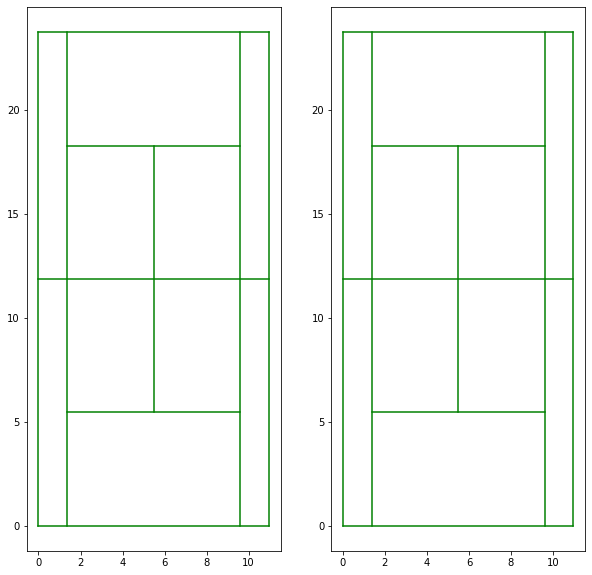

In [151]:
#相手のリターン位置 1set
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(10.0, 10.0))
#ax1=plt.axes()
#ax2=plt.axes()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1=drawCourt(ax1)
ax2=drawCourt(ax2)


sx1,sy1,rx1,ry1=inputXY(bounce_return_1set,'1st','Nishioka')
sx2,sy2,rx2,ry2=inputXY(bounce_return_1set,'2nd','Nishioka')

rx1,ry1=reverseXYList(rx1,ry1)
rx2,ry2=reverseXYList(rx2,ry2)

ax1.scatter(rx1,ry1,s=5,label='1st')
ax1.scatter(rx2,ry2,s=5,label='2nd')

sx1,sy1,rx1,ry1=inputXY(bounce_return_1set,'1st','Nakashima')
sx2,sy2,rx2,ry2=inputXY(bounce_return_1set,'2nd','Nakashima')

rx1,ry1=reverseXYList(rx1,ry1)
rx2,ry2=reverseXYList(rx2,ry2)

ax2.scatter(rx1,ry1,s=5,label='1st')
ax2.scatter(rx2,ry2,s=5,label='2nd')

ax1.legend(loc='upper center')
ax2.legend(loc='upper center')

ax1.set_xlim(-4,14)
ax1.set_ylim(30,10)
ax2.set_xlim(-4,14)
ax2.set_ylim(30,10)

ax1.set_aspect('equal')
ax2.set_aspect('equal')

ax1.set_title("Nakashima 1Set")
ax2.set_title("Nishioka 1Set")

ValueError: not enough values to unpack (expected 4, got 2)

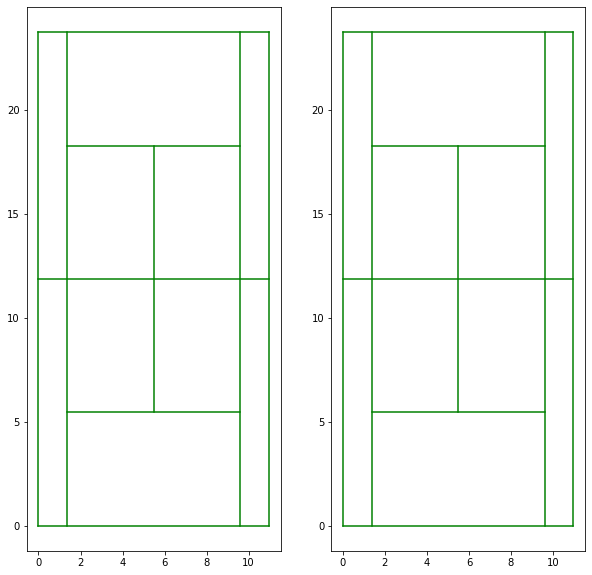

In [149]:
#相手のリターン位置 2set
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(10.0, 10.0))
#ax1=plt.axes()
#ax2=plt.axes()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1=drawCourt(ax1)
ax2=drawCourt(ax2)


sx1,sy1,rx1,ry1=inputXY(bounce_return_2set,'1st','Nishioka')
sx2,sy2,rx2,ry2=inputXY(bounce_return_2set,'2nd','Nishioka')

rx1,ry1=reverseXYList(rx1,ry1)
rx2,ry2=reverseXYList(rx2,ry2)

ax1.scatter(rx1,ry1,s=5,label='1st')
ax1.scatter(rx2,ry2,s=5,label='2nd')

sx1,sy1,rx1,ry1=inputXY(bounce_return_2set,'1st','Nakashima')
sx2,sy2,rx2,ry2=inputXY(bounce_return_2set,'2nd','Nakashima')

rx1,ry1=reverseXYList(rx1,ry1)
rx2,ry2=reverseXYList(rx2,ry2)

ax2.scatter(rx1,ry1,s=5,label='1st')
ax2.scatter(rx2,ry2,s=5,label='2nd')

ax1.legend(loc='upper center')
ax2.legend(loc='upper center')

ax1.set_xlim(-4,14)
ax1.set_ylim(30,10)
ax2.set_xlim(-4,14)
ax2.set_ylim(30,10)

ax1.set_aspect('equal')
ax2.set_aspect('equal')

ax1.set_title("Nakashima 2Set")
ax2.set_title("Nishioka 2Set")

Text(0.5, 1.0, 'Nishioka 3Set')

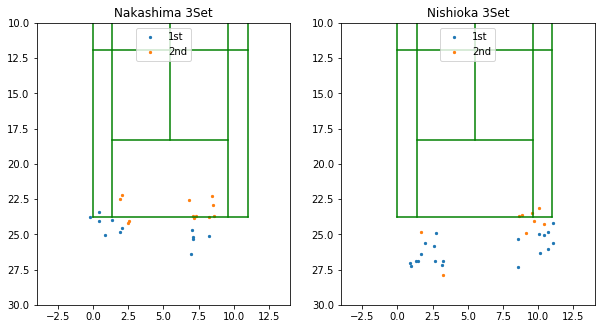

In [172]:
#相手のリターン位置 3set
import matplotlib.pyplot as plt
%matplotlib inline


fig=plt.figure(figsize=(10.0, 10.0))
#ax1=plt.axes()
#ax2=plt.axes()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1=drawCourt(ax1)
ax2=drawCourt(ax2)


sx1,sy1,rx1,ry1=inputXY(bounce_return_3set,'1st','Nishioka')
sx2,sy2,rx2,ry2=inputXY(bounce_return_3set,'2nd','Nishioka')

rx1,ry1=reverseXYList(rx1,ry1)
rx2,ry2=reverseXYList(rx2,ry2)

ax1.scatter(rx1,ry1,s=5,label='1st')
ax1.scatter(rx2,ry2,s=5,label='2nd')

sx1,sy1,rx1,ry1=inputXY(bounce_return_3set,'1st','Nakashima')
sx2,sy2,rx2,ry2=inputXY(bounce_return_3set,'2nd','Nakashima')

rx1,ry1=reverseXYList(rx1,ry1)
rx2,ry2=reverseXYList(rx2,ry2)

ax2.scatter(rx1,ry1,s=5,label='1st')
ax2.scatter(rx2,ry2,s=5,label='2nd')

ax1.legend(loc='upper center')
ax2.legend(loc='upper center')

ax1.set_xlim(-4,14)
ax1.set_ylim(30,10)
ax2.set_xlim(-4,14)
ax2.set_ylim(30,10)

ax1.set_aspect('equal')
ax2.set_aspect('equal')

ax1.set_title("Nakashima 3Set")
ax2.set_title("Nishioka 3Set")

4.247419354838709
4.009032258064516
3.685490196078431
3.2407407407407414


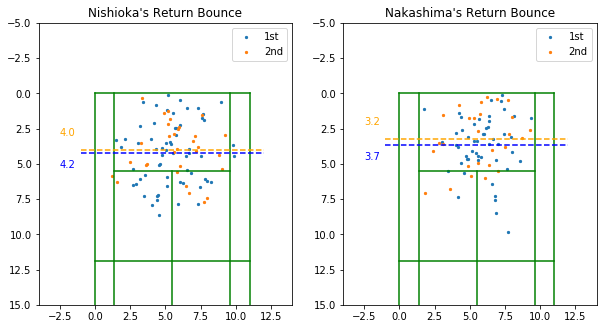

In [134]:
#リターンの着地点のプロット
import matplotlib.pyplot as plt
%matplotlib inline

def drawCourt(ax):#テニスコートラインを描画
    #横線
    ax.plot([0,10.97], [11.89,11.89], color = "green")
    ax.plot([0,10.97], [0,0], color = "green")
    ax.plot([0,10.97], [11.89*2,11.89*2], color = "green")
    ax.plot([10.97/2,10.97/2], [5.49,11.89*2-5.49], color = "green")

    #縦線
    ax.plot([0,0], [0,11.89*2], color = "green")
    ax.plot([1.37,1.37], [0,11.89*2], color = "green")
    ax.plot([1.37+8.23,1.37+8.23], [0,11.89*2], color = "green")
    ax.plot([1.37+8.23+1.37,1.37+8.23+1.37], [0,11.89*2], color = "green")

    ax.plot([1.37,1.37+8.23], [5.49,5.49], color = "green")
    ax.plot([1.37,1.37+8.23], [11.89*2-5.49,11.89*2-5.49], color = "green")
    return ax

def inputXY(bounce_serve,FS,playerName):
    x=bounce_serve[playerName][FS]['ballx'].values.tolist()
    y=bounce_serve[playerName][FS]['bally'].values.tolist()
    x = [float(s) for s in x]
    y = [float(s) for s in y]
    return x,y


def reverseXYList(xlist,ylist):
    xlist_r=[]
    ylist_r=[]
    for i, (x, y) in enumerate(zip(xlist, ylist)):
        if(y>11.89):
            y=11.89-(y-11.89)
            x=5.485-(x-5.485)
        xlist_r.append(x)
        ylist_r.append(y)
    ave = sum(ylist_r)/len(ylist_r)
    print(ave)
    return xlist_r,ylist_r,ave


def plotImpact_return(bounce_data):
    fig=plt.figure(figsize=(10.0, 10.0))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    ax1=drawCourt(ax1)
    ax2=drawCourt(ax2)

    x1,y1=inputXY(bounce_data,'1st','Nakashima')#bounce_serve
    x2,y2=inputXY(bounce_data,'2nd','Nakashima')

    x1,y1,ave1=reverseXYList(x1,y1)
    x2,y2,ave2=reverseXYList(x2,y2)

    ax1.scatter(x1,y1,s=5,label='1st')
    ax1.scatter(x2,y2,s=5,label='2nd')
    ax1.plot([-1,10.97+1],[ave1,ave1],color = "blue", linestyle="dashed")
    ax1.plot([-1,10.97+1],[ave2,ave2],color = "orange", linestyle="dashed")
    ax1.text(-2.5, ave1+1, str(round(ave1,1)),color="blue")
    ax1.text(-2.5, ave2-1, str(round(ave2,1)),color="orange")
    
    x1,y1=inputXY(bounce_data,'1st','Nishioka')
    x2,y2=inputXY(bounce_data,'2nd','Nishioka')

    x1,y1,ave1=reverseXYList(x1,y1)
    x2,y2,ave2=reverseXYList(x2,y2)

    ax2.scatter(x1,y1,s=5,label='1st')
    ax2.scatter(x2,y2,s=5,label='2nd')
    ax2.plot([-1,10.97+1],[ave1,ave1],color = "blue", linestyle="dashed")
    ax2.plot([-1,10.97+1],[ave2,ave2],color = "orange", linestyle="dashed")
    ax2.text(-2.5, ave1+1, str(round(ave1,1)),color="blue")
    ax2.text(-2.5, ave2-1, str(round(ave2,1)),color="orange")

    ax1.legend()
    ax2.legend()

    ax1.set_xlim(-4,14)
    ax1.set_ylim(15,-5)
    ax2.set_xlim(-4,14)
    ax2.set_ylim(15,-5)

    ax1.set_title("Nishioka's Return Bounce")
    ax2.set_title("Nakashima's Return Bounce")

    ax1.set_aspect('equal')
    ax2.set_aspect('equal')


    
plotImpact_return(bounce_return_bounce)

4.636923076923077
4.617500000000001
4.354615384615386
3.7466666666666666


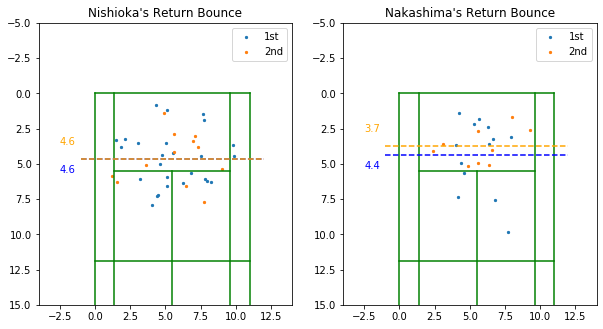

In [135]:
plotImpact_return(bounce_return_bounce_1set)

3.9061904761904778
3.3441666666666676
3.7544827586206897
2.971250000000001


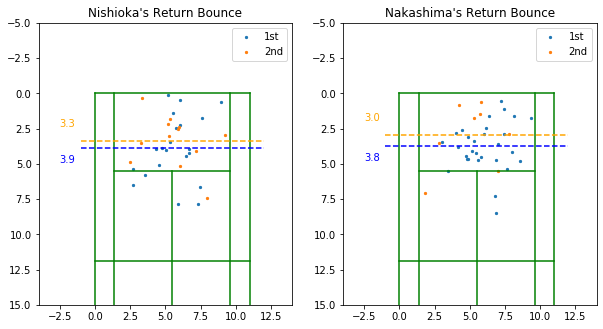

In [136]:
plotImpact_return(bounce_return_bounce_2set)

4.050000000000001
4.105714285714286
2.496666666666668
3.001000000000001


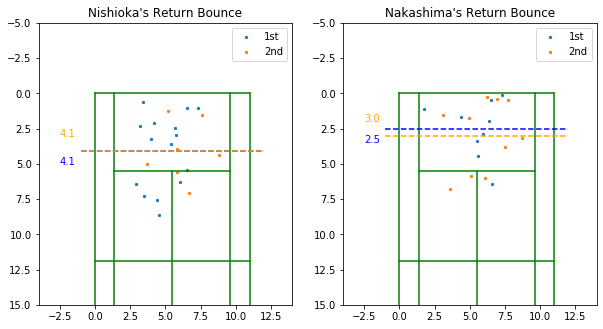

In [137]:
plotImpact_return(bounce_return_bounce_3set)